In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
dataset = pd.read_csv('/content/gdrive/My Drive/CBD_Assignment 1/News_Final.csv')
enc = OrdinalEncoder()
dataset[["Topic"]] = enc.fit_transform(dataset[["Topic"]])
dataset

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,1.0,"On The Economy, Give Obama AD",Hillary Clinton got the laugh line of the week...,Forbes,0.0,2015-11-09 22:40,0.087462,-0.093750,13,1,2
1,2.0,"To one CEO, 'Janet Yellen's Magic Money Machin...","""""""I believe something is shifting in the unde...",MarketWatch,0.0,2015-11-09 22:40,0.037689,-0.177667,42,0,0
2,3.0,3 Ways to Jumpstart a Community-Grounded Economy,"This article is part of New Economy Week, a co...",YES! Magazine,0.0,2015-11-09 9:40,-0.094491,-0.060817,98,23,0
3,4.0,"Despite China Slowdown, Global Economy Expecte...",Global trade and economic activity--held back ...,International Business Times,0.0,2015-11-09 11:40,0.077340,-0.079204,7,1,10
4,5.0,New Economy Week Starts Here,"New Economy Week Starts Here. This week, we br...",YES! Magazine,0.0,2015-11-09 9:40,-0.065219,-0.145935,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93234,104798.0,Obama administration proposes new rules for K-...,But it almost certainly won't be the Obama adm...,Washington Post,2.0,2016-07-06 23:20,0.036828,-0.109109,33,3,1
93235,104799.0,Tournoi de foot solidaire pour la Palestine,Dans le cadre de la campagne annuelle de solid...,L'Humanité,3.0,2016-07-07 15:20,-0.047246,-0.106600,4,0,0
93236,104800.0,"Car, truck and motorcycle enthusiasts will gat...","Car, truck and motorcycle enthusiasts will gat...",Palestine Herald Press,3.0,2016-07-06 0:00,0.000000,0.104257,1,0,0
93237,104801.0,Obama heads to Europe amid British referendum'...,President Barack Obama is slated to embark on ...,Associated Press via Yahoo! Finance,2.0,2016-07-07 8:30,0.000000,0.013700,0,0,0


In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
imputer = imputer.fit(dataset[["Topic","SentimentTitle","SentimentHeadline"]])
 
# Imputing the data    
dataset[["Topic","SentimentTitle","SentimentHeadline"]] = imputer.transform(dataset[["Topic","SentimentTitle","SentimentHeadline"]])
dataset

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,1.0,"On The Economy, Give Obama AD",Hillary Clinton got the laugh line of the week...,Forbes,0.0,2015-11-09 22:40,0.087462,-0.093750,13,1,2
1,2.0,"To one CEO, 'Janet Yellen's Magic Money Machin...","""""""I believe something is shifting in the unde...",MarketWatch,0.0,2015-11-09 22:40,0.037689,-0.177667,42,0,0
2,3.0,3 Ways to Jumpstart a Community-Grounded Economy,"This article is part of New Economy Week, a co...",YES! Magazine,0.0,2015-11-09 9:40,-0.094491,-0.060817,98,23,0
3,4.0,"Despite China Slowdown, Global Economy Expecte...",Global trade and economic activity--held back ...,International Business Times,0.0,2015-11-09 11:40,0.077340,-0.079204,7,1,10
4,5.0,New Economy Week Starts Here,"New Economy Week Starts Here. This week, we br...",YES! Magazine,0.0,2015-11-09 9:40,-0.065219,-0.145935,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93234,104798.0,Obama administration proposes new rules for K-...,But it almost certainly won't be the Obama adm...,Washington Post,2.0,2016-07-06 23:20,0.036828,-0.109109,33,3,1
93235,104799.0,Tournoi de foot solidaire pour la Palestine,Dans le cadre de la campagne annuelle de solid...,L'Humanité,3.0,2016-07-07 15:20,-0.047246,-0.106600,4,0,0
93236,104800.0,"Car, truck and motorcycle enthusiasts will gat...","Car, truck and motorcycle enthusiasts will gat...",Palestine Herald Press,3.0,2016-07-06 0:00,0.000000,0.104257,1,0,0
93237,104801.0,Obama heads to Europe amid British referendum'...,President Barack Obama is slated to embark on ...,Associated Press via Yahoo! Finance,2.0,2016-07-07 8:30,0.000000,0.013700,0,0,0


 Random Forest working- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [ ]:
# Gives the names of the columns/features
print(dataset.keys())

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')


Data Exploration and cleaning
https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  float64
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 7.8+ MB


In [ ]:
dataset.isnull().sum(axis = 0)

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [ ]:
dataset = dataset.drop(columns = ['Headline', 'Source'])
#df.drop(columns=['B', 'C'])
dataset.head()

,IDLink,Title,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,1.0,"On The Economy, Give Obama AD",0.0,2015-11-09 22:40,0.087462,-0.093750,13,1,2
1,2.0,"To one CEO, 'Janet Yellen's Magic Money Machin...",0.0,2015-11-09 22:40,0.037689,-0.177667,42,0,0
2,3.0,3 Ways to Jumpstart a Community-Grounded Economy,0.0,2015-11-09 9:40,-0.094491,-0.060817,98,23,0
3,4.0,"Despite China Slowdown, Global Economy Expecte...",0.0,2015-11-09 11:40,0.077340,-0.079204,7,1,10
4,5.0,New Economy Week Starts Here,0.0,2015-11-09 9:40,-0.065219,-0.145935,34,0,0


drop columns= https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
# Calculate first and third quartile
first_quartile = dataset['SentimentTitle'].describe()['25%']
third_quartile = dataset['SentimentTitle'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = dataset[(dataset['SentimentTitle'] > (first_quartile - 3 * iqr)) &
            (dataset['SentimentTitle'] < (third_quartile + 3 * iqr))]

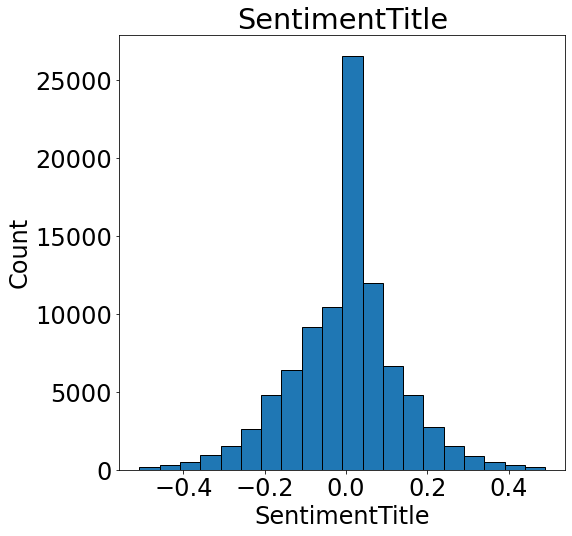

In [ ]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24
#figsize(8, 8)
f = plt.figure(figsize=(8,8))
plt.hist(df['SentimentTitle'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('SentimentTitle'); 
plt.ylabel('Count'); plt.title('SentimentTitle');  #Single Variable plots

In [ ]:
# Calculate first and third quartile
first_quartile = dataset['SentimentHeadline'].describe()['25%']
third_quartile = dataset['SentimentHeadline'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = dataset[(dataset['SentimentHeadline'] > (first_quartile - 3 * iqr)) &
            (dataset['SentimentHeadline'] < (third_quartile + 3 * iqr))]

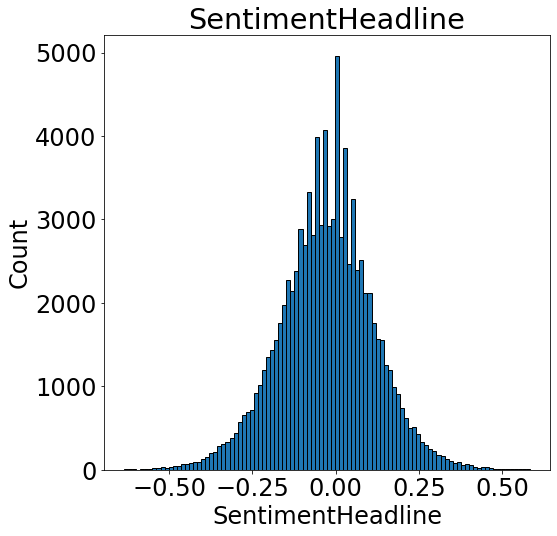

In [ ]:
f = plt.figure(figsize=(8,8))
plt.hist(df['SentimentHeadline'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('SentimentHeadline'); 
plt.ylabel('Count'); plt.title('SentimentHeadline');  # Single Variable Plots

In [ ]:
# Find all correlations with the score and sort 
correlations_data = dataset.corr()['Topic'].sort_values()
# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

LinkedIn            -0.035095
SentimentTitle       0.002707
SentimentHeadline    0.028683
GooglePlus           0.067622
Facebook             0.105247
IDLink               0.748825
Topic                1.000000
Name: Topic, dtype: float64 

LinkedIn            -0.035095
SentimentTitle       0.002707
SentimentHeadline    0.028683
GooglePlus           0.067622
Facebook             0.105247
IDLink               0.748825
Topic                1.000000
Name: Topic, dtype: float64


In [ ]:
# Find all correlations with the score and sort 
correlations_data = dataset.corr()['SentimentTitle'].sort_values()
# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

GooglePlus          -0.010266
Facebook            -0.003807
Topic                0.002707
LinkedIn             0.003411
IDLink               0.005025
SentimentHeadline    0.183555
SentimentTitle       1.000000
Name: SentimentTitle, dtype: float64 

GooglePlus          -0.010266
Facebook            -0.003807
Topic                0.002707
LinkedIn             0.003411
IDLink               0.005025
SentimentHeadline    0.183555
SentimentTitle       1.000000
Name: SentimentTitle, dtype: float64


In [ ]:
# Find all correlations with the score and sort 
correlations_data = dataset.corr()['SentimentHeadline'].sort_values()
# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Facebook             0.000456
GooglePlus           0.001741
LinkedIn             0.005922
IDLink               0.024476
Topic                0.028683
SentimentTitle       0.183555
SentimentHeadline    1.000000
Name: SentimentHeadline, dtype: float64 

Facebook             0.000456
GooglePlus           0.001741
LinkedIn             0.005922
IDLink               0.024476
Topic                0.028683
SentimentTitle       0.183555
SentimentHeadline    1.000000
Name: SentimentHeadline, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


IndexError: ignored

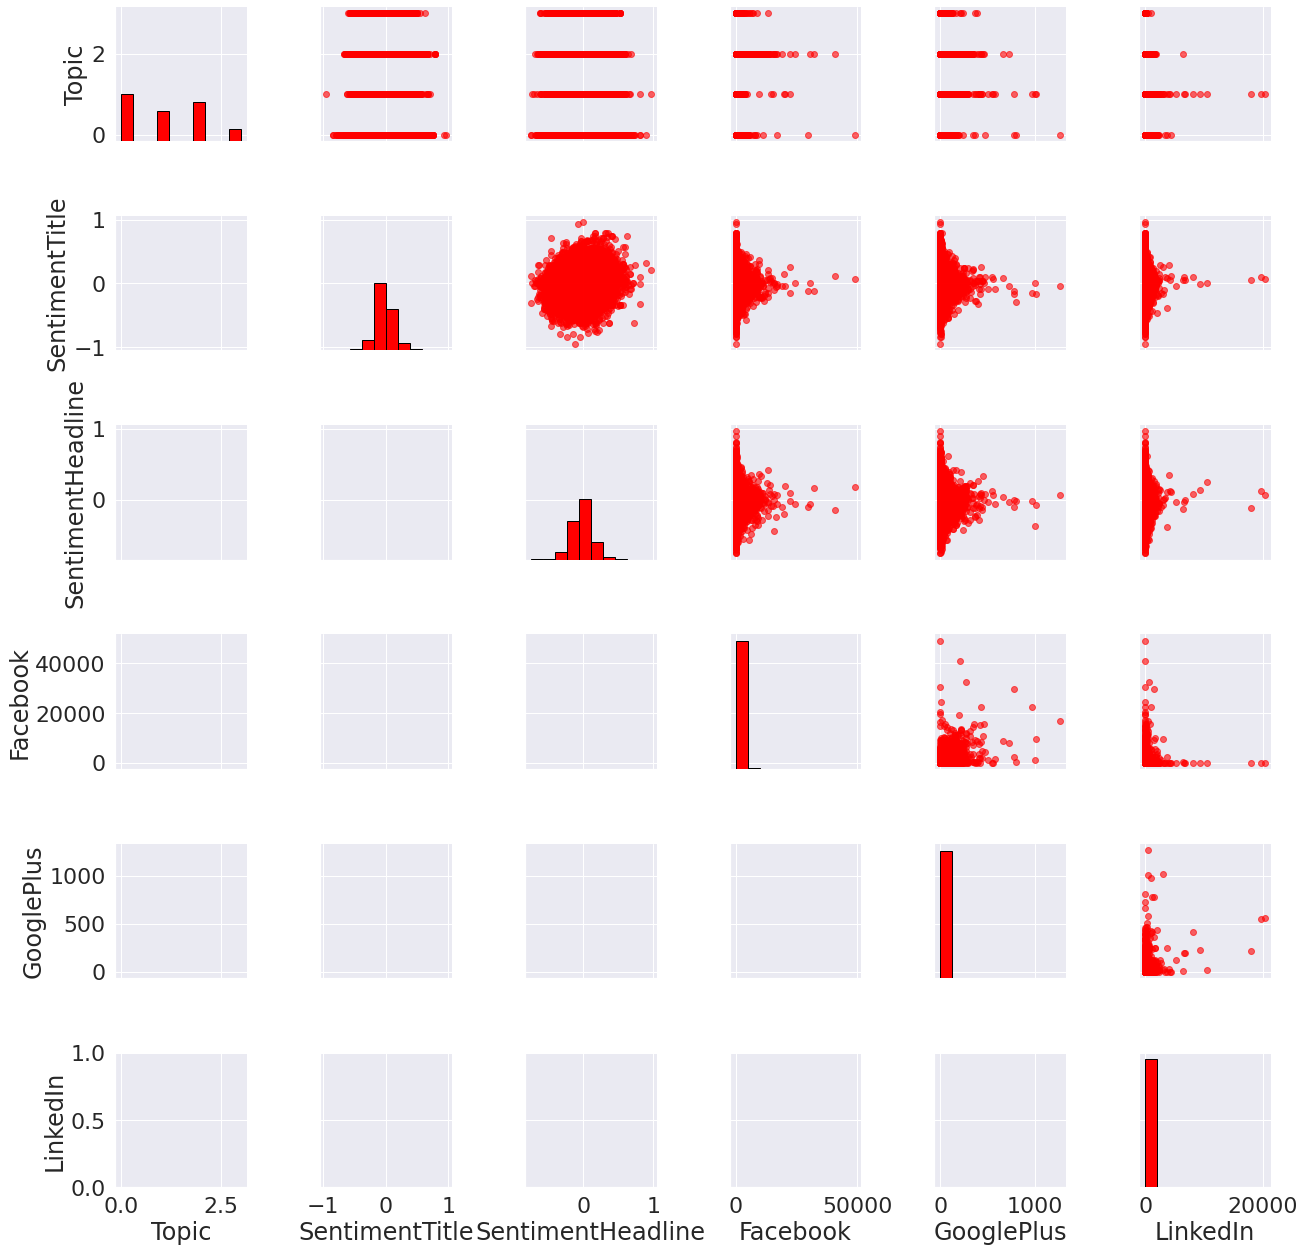

In [ ]:
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Extract the columns to  plot
plot_data = dataset[['Topic', 'SentimentTitle', 
                      'SentimentHeadline', 
                      'Facebook', 'GooglePlus','LinkedIn']]


# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[4][5]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a55c415f0> (for post_execute):


KeyboardInterrupt: ignored

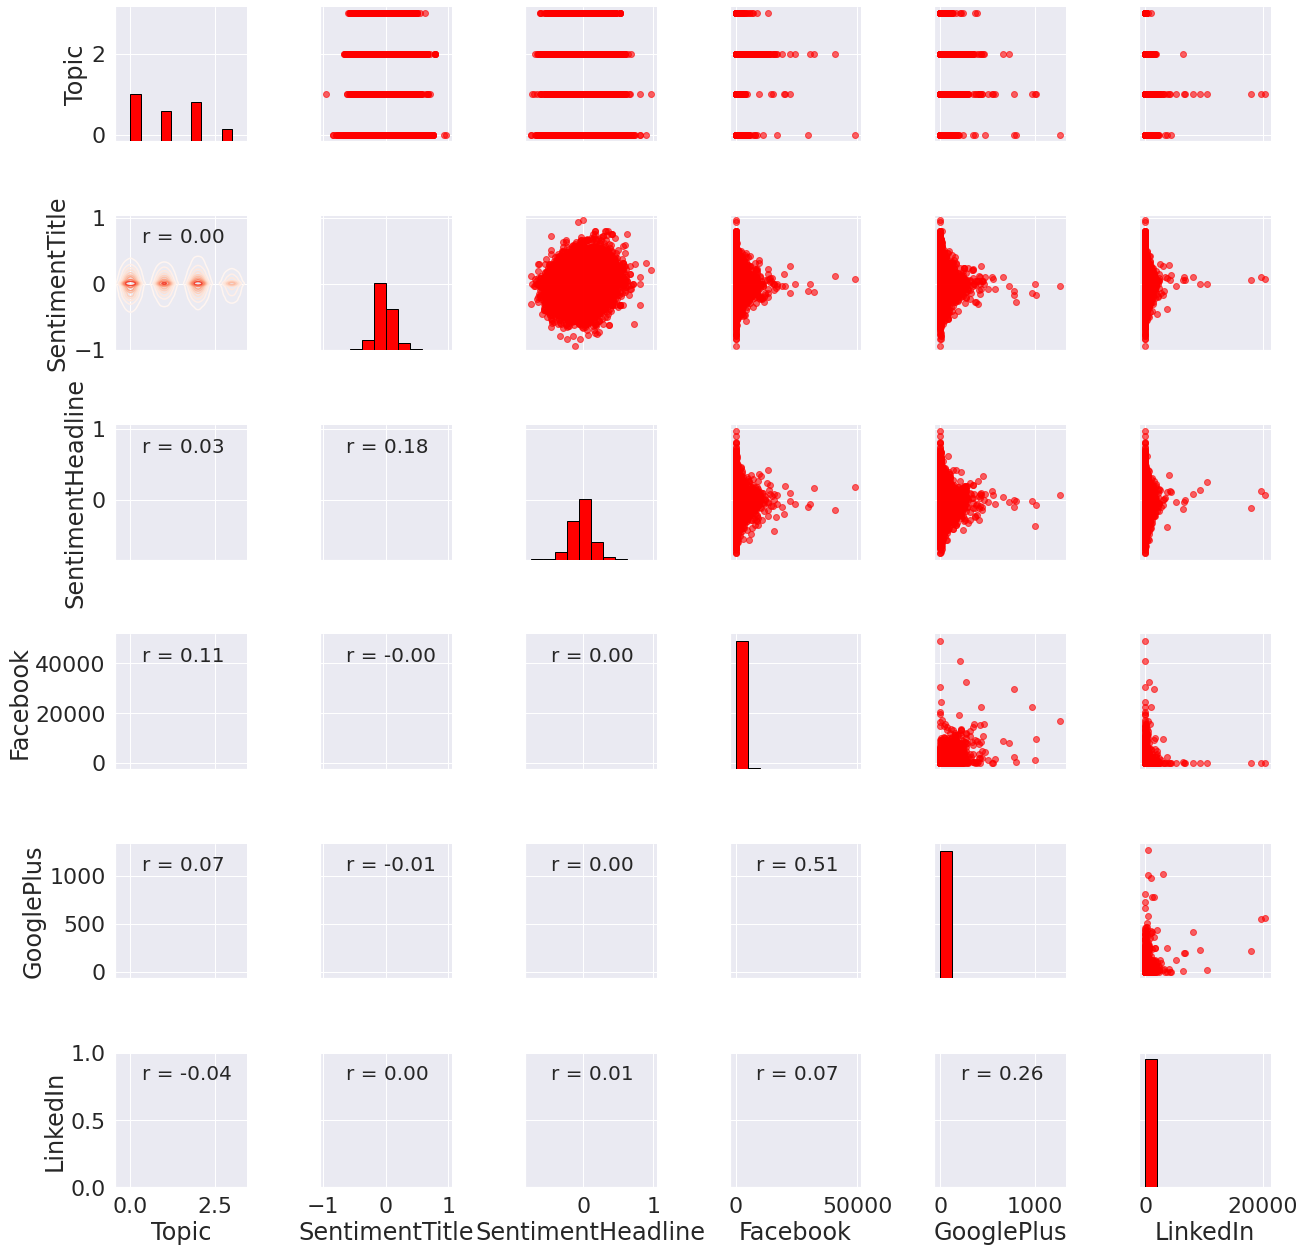

In [ ]:
# Extract the columns to  plot
plot_data = dataset[['Topic', 'SentimentTitle', 
                      'SentimentHeadline', 
                      'Facebook', 'GooglePlus','LinkedIn']]


# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[4][5]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', height = 36, y = 1.02);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


IndexError: ignored

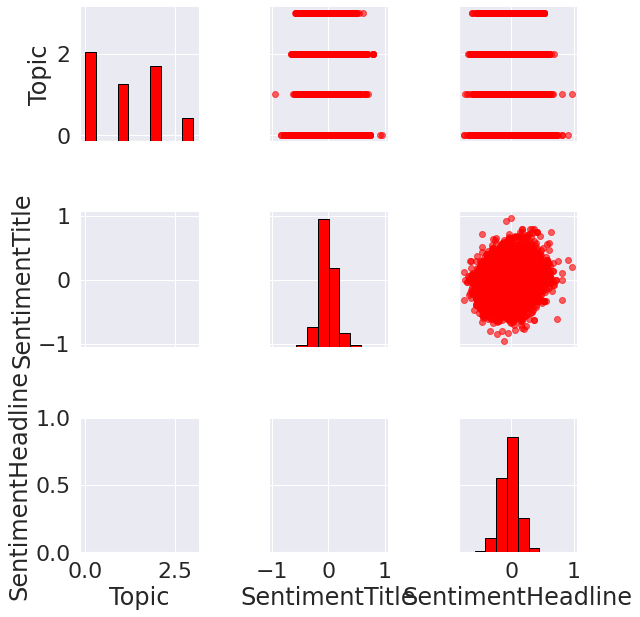

In [ ]:
# Extract the columns to  plot
plot_data = dataset[['Topic', 'SentimentTitle', 
                      'SentimentHeadline']]


# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[2][4][5]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', height = 36, y = 1.02);